In [1]:

import os
import librosa as lr
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scale_file ='Downloads/hello/touxn.wav'

In [3]:
ipd.Audio(scale_file)

In [4]:
# load audio files with librosa
scale, sr = librosa.load(scale_file)

In [5]:
#Extracting Short-Time Fourier Transform


In [6]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [7]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [8]:
S_scale.shape

(1025, 431)

In [9]:
type(S_scale[0][0])

numpy.complex64

In [10]:
#Calculating the spectrogram

In [11]:
Y_scale = np.abs(S_scale) ** 2

In [12]:
Y_scale.shape

(1025, 431)

In [13]:
type(Y_scale[0][0])

numpy.float32

In [14]:
#Visualizing the spectrogram

In [15]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

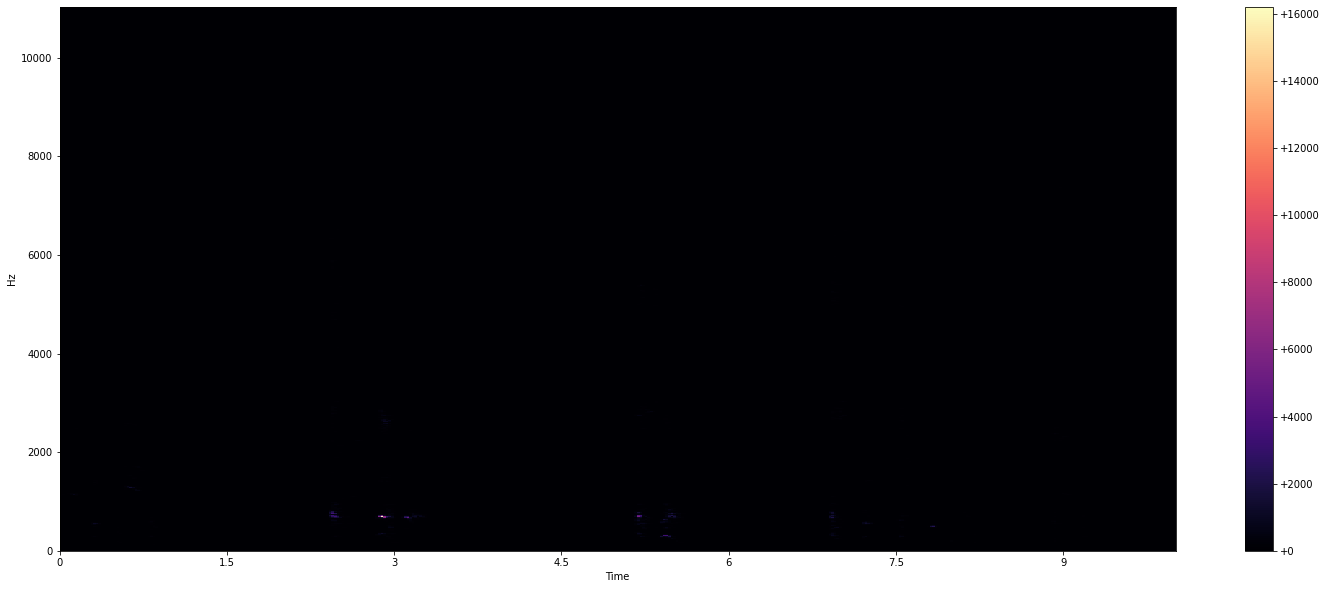

In [16]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

In [17]:
#Log-Amplitude Spectrogram

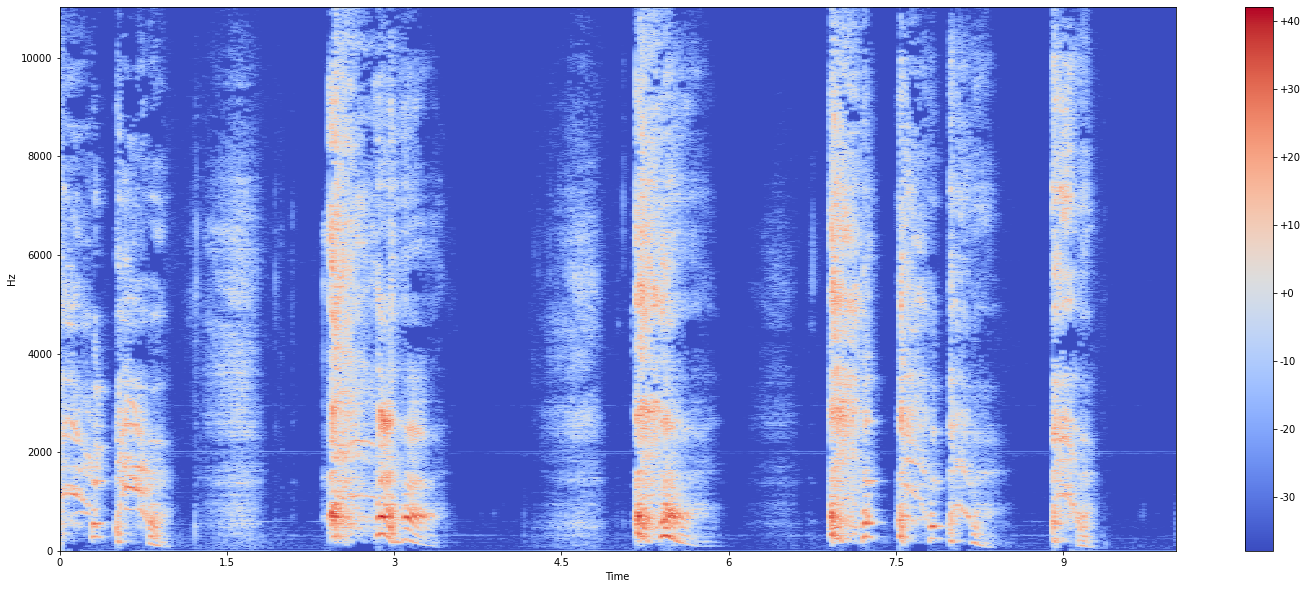

In [18]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

In [19]:
Y_log_scale.mean()

-25.147411

In [19]:
#Log-Frequency Spectrogram


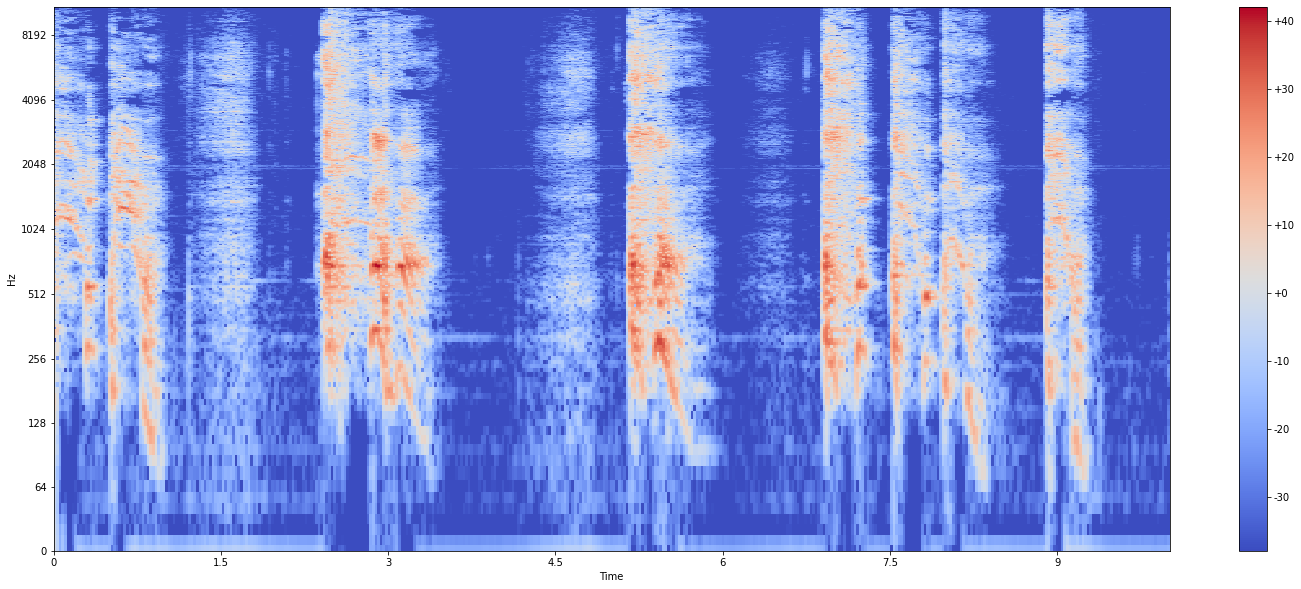

In [20]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [21]:
#comparaison between a person who has covid nd safe person

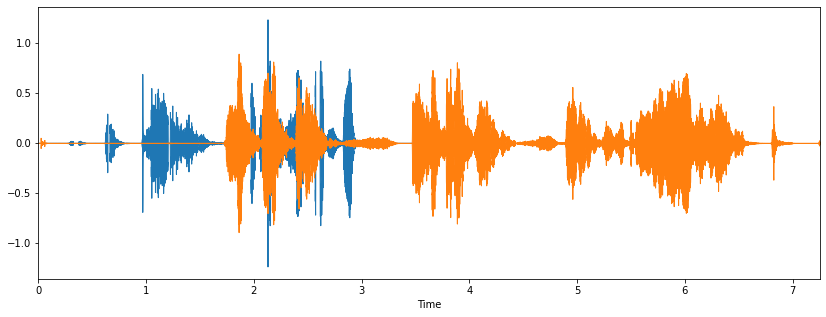

In [22]:
filename1='Downloads/projectsound/cov1.wav'
filename2='Downloads/projectsound/cov2.wav'
import librosa
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename1)
data1, sample_rate1 = librosa.load(filename2)
librosa.display.waveplot(data, sr=sample_rate)
librosa.display.waveplot(data1, sr=sample_rate1)
ipd.Audio(filename1)
ipd.Audio(filename2)

In [23]:
# spectral centroid with librossa

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd 

In [25]:
ipd.Audio(filename1)

In [26]:
# load audio files with librosa
filename1, sr = librosa.load(filename1)

In [27]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
sc_filename1 = librosa.feature.spectral_centroid(y=filename1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [28]:
sc_filename1.shape


(161,)

In [29]:
#Visualising spectral centroid

In [30]:
frames = range(len(sc_filename1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [31]:
len(t)

161

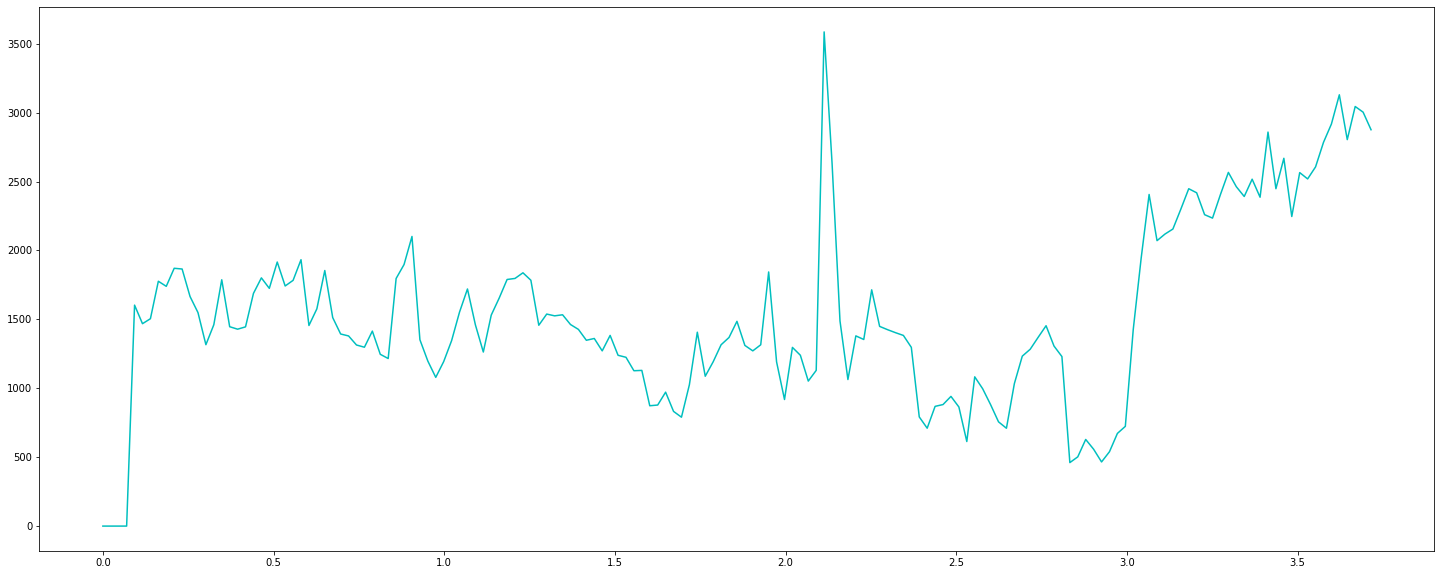

In [32]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_filename1, color='c')

plt.show()

In [33]:
#Spectral bandwidth with Librosa

In [34]:

ban_filename1 = librosa.feature.spectral_bandwidth(y=filename1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [35]:
ban_filename1.shape

(161,)

In [36]:
#Visualising spectral bandwidth

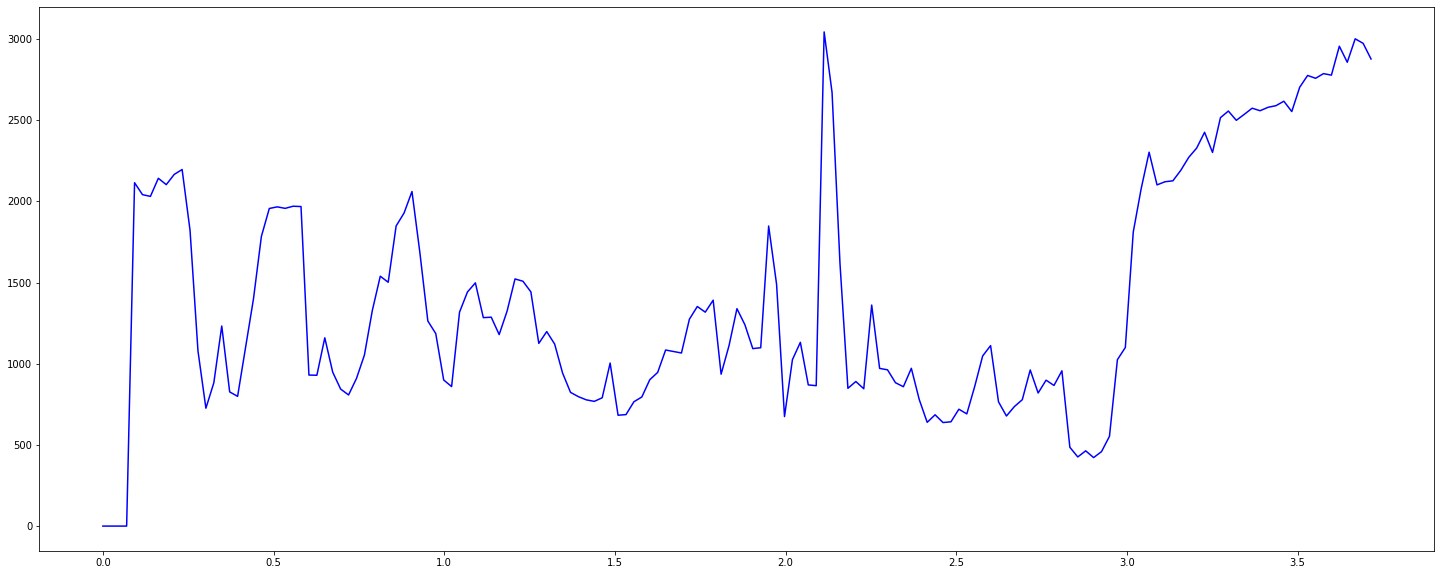

In [37]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_filename1, color='b')
plt.show()